# **Assignment - 1: Machine Learning Programming (AIDI)**


# Part A 

In [3]:
import pandas as pd
from scipy.stats import shapiro
from sklearn.preprocessing import StandardScaler,LabelEncoder 

# Step 1: Load the Dataset
# Load the dataset from the CSV file into a DataFrame
data = pd.read_csv('noisy_data.csv')

# Display the first few rows of the dataset to understand its structure
print(data.head())

   Region   Age   Income Online Shopper
0   India  49.0  86400.0             No
1  Brazil  32.0  57600.0            Yes
2     USA  35.0  64800.0             No
3  Brazil  43.0  73200.0             No
4     USA  45.0      NaN            Yes


In [4]:
# Step 2: Handle Missing Values by Imputation
# Check for missing values in each column
print("Missing values before imputation:\n", data.isnull().sum())

Missing values before imputation:
 Region            0
Age               1
Income            1
Online Shopper    0
dtype: int64


In [17]:
# Impute missing numerical values
data['Age'].fillna(data['Age'].median(), inplace=True)  # Impute Age with median
data['Income'].fillna(data['Income'].mean(), inplace=True)  # Impute Income with mean

# Check for missing values after imputation
print("Missing values after imputation:\n", data.isnull().sum())

Missing values after imputation:
 Region            0
Age               0
Income            0
Online Shopper    0
dtype: int64


C:\Users\nmlto\AppData\Local\Temp\ipykernel_22440\1757102528.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Age'].fillna(data['Age'].median(), inplace=True)  # Impute Age with median
C:\Users\nmlto\AppData\Local\Temp\ipykernel_22440\1757102528.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values al

In [5]:
# Step 3: Apply Normality Tests to Numerical Columns
#Null Hypothesis (H0): The data is normally distributed.
#Alternative Hypothesis (H1): The data is not normally distributed.

# Shapiro-Wilk test for Age
stat_age, p_age = shapiro(data['Age'])
print(f'Shapiro-Wilk Test for Age: Stat={stat_age}, p-value={p_age}')

# Shapiro-Wilk test for Income
stat_income, p_income = shapiro(data['Income'])
print(f'Shapiro-Wilk Test for Income: Stat={stat_income}, p-value={p_income}')

# Interpretation of results
alpha = 0.05  # significance level
if p_age > alpha:
    print("Age is normally distributed (Fail to reject H0)")
else:
    print("Age is not normally distributed (Reject H0)")

if p_income > alpha:
    print("Income is normally distributed (Fail to reject H0)")
else:
    print("Income is not normally distributed (Reject H0)")

Shapiro-Wilk Test for Age: Stat=nan, p-value=1.0
Shapiro-Wilk Test for Income: Stat=nan, p-value=1.0
Age is normally distributed (Fail to reject H0)
Income is normally distributed (Fail to reject H0)


In [25]:
# Step 4: Encode Categorical Variables

# Label Encoding for 'Online Shopper'
le = LabelEncoder()
data['Online Shopper'] = le.fit_transform(data['Online Shopper'])

# One-Hot Encoding for 'Region'
data = pd.get_dummies(data, columns=['Region'], drop_first=True)

# Display the transformed dataset
print(data.head())

# Step 5: Scale Numerical Features
scaler = StandardScaler()
data[['Age', 'Income']] = scaler.fit_transform(data[['Age', 'Income']])

# Display scaled data
print(data[['Age', 'Income']].head())

# Display the cleaned and scaled dataset
print("\nCleaned and Scaled Data:\n", data.head())

# Optionally, save the cleaned dataset to a new CSV file
data.to_csv('cleaned_data.csv', index=False)

    Age   Income  Online Shopper  Region_India  Region_USA
0  49.0  86400.0               0          True       False
1  32.0  57600.0               1         False       False
2  35.0  64800.0               0         False        True
3  43.0  73200.0               0         False       False
4  45.0      NaN               1         False        True
        Age    Income
0  0.719931  0.711013
1 -1.623675 -1.364376
2 -1.210098 -0.845529
3 -0.107224 -0.240207
4  0.168495       NaN

Cleaned and Scaled Data:
         Age    Income  Online Shopper  Region_India  Region_USA
0  0.719931  0.711013               0          True       False
1 -1.623675 -1.364376               1         False       False
2 -1.210098 -0.845529               0         False        True
3 -0.107224 -0.240207               0         False       False
4  0.168495       NaN               1         False        True


In [6]:
# Check the final dataset structure and summary
print(data.info())
print(data.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Region          10 non-null     object 
 1   Age             9 non-null      float64
 2   Income          9 non-null      float64
 3   Online Shopper  10 non-null     object 
dtypes: float64(2), object(2)
memory usage: 452.0+ bytes
None
             Age        Income
count   9.000000      9.000000
mean   43.777778  76533.333333
std     7.693793  14718.695594
min    32.000000  57600.000000
25%    40.000000  64800.000000
50%    43.000000  73200.000000
75%    49.000000  86400.000000
max    55.000000  99600.000000


# Part B

In [8]:
pip install nltk

Note: you may need to restart the kernel to use updated packages.


In [9]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\nmlto\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\nmlto\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [9]:
import re
from nltk.tokenize import word_tokenize, RegexpTokenizer
from nltk.corpus import stopwords

# Load the text from the file
with open('wiki.txt', 'r', encoding='utf-8') as file:
    text = file.read()

# Define stop words (You can customize this list as needed)
stop_words = set(stopwords.words('english'))

# Step 1: Tokenization using word_tokenize() from NLTK
# Tokenize the text using word_tokenize
word_tokens = word_tokenize(text)

# Remove stop words and punctuation
filtered_word_tokens = [word for word in word_tokens if word.isalnum() and word.lower() not in stop_words]

print("Tokens using word_tokenize():")
print(filtered_word_tokens)

Tokens using word_tokenize():
['history', 'NLP', 'generally', 'started', '1950s', 'although', 'work', 'found', 'earlier', 'periods', '1950', 'Alan', 'Turing', 'published', 'article', 'titled', 'Computing', 'Machinery', 'Intelligence', 'proposed', 'called', 'Turing', 'test', 'criterion', 'intelligence', 'Georgetown', 'experiment', '1954', 'involved', 'fully', 'automatic', 'translation', 'sixty', 'Russian', 'sentences', 'English', 'authors', 'claimed', 'within', 'three', 'five', 'years', 'machine', 'translation', 'would', 'solved', 'problem', '2', 'However', 'real', 'progress', 'much', 'slower', 'ALPAC', 'report', '1966', 'found', 'research', 'failed', 'fulfill', 'expectations', 'funding', 'machine', 'translation', 'dramatically', 'reduced', 'Little', 'research', 'machine', 'translation', 'conducted', 'late', '1980s', 'first', 'statistical', 'machine', 'translation', 'systems', 'developed', 'notably', 'successful', 'NLP', 'systems', 'developed', '1960s', 'SHRDLU', 'system', 'working', 'r

In [10]:
# Step 2: Tokenization using RegexpTokenizer
# Define a RegexpTokenizer that only captures word characters
regexp_tokenizer = RegexpTokenizer(r'\w+')
regexp_tokens = regexp_tokenizer.tokenize(text)

# Remove stop words
filtered_regexp_tokens = [word for word in regexp_tokens if word.lower() not in stop_words]

print("\nTokens using RegexpTokenizer():")
print(filtered_regexp_tokens)


Tokens using RegexpTokenizer():
['history', 'NLP', 'generally', 'started', '1950s', 'although', 'work', 'found', 'earlier', 'periods', '1950', 'Alan', 'Turing', 'published', 'article', 'titled', 'Computing', 'Machinery', 'Intelligence', 'proposed', 'called', 'Turing', 'test', 'criterion', 'intelligence', 'Georgetown', 'experiment', '1954', 'involved', 'fully', 'automatic', 'translation', 'sixty', 'Russian', 'sentences', 'English', 'authors', 'claimed', 'within', 'three', 'five', 'years', 'machine', 'translation', 'would', 'solved', 'problem', '2', 'However', 'real', 'progress', 'much', 'slower', 'ALPAC', 'report', '1966', 'found', 'ten', 'year', 'long', 'research', 'failed', 'fulfill', 'expectations', 'funding', 'machine', 'translation', 'dramatically', 'reduced', 'Little', 'research', 'machine', 'translation', 'conducted', 'late', '1980s', 'first', 'statistical', 'machine', 'translation', 'systems', 'developed', 'notably', 'successful', 'NLP', 'systems', 'developed', '1960s', 'SHRDLU

In [11]:
# Step 3: Regular Expression to Extract Year Mentions
# Extract all year mentions (assuming years are in the format YYYY)
years = re.findall(r'\b\d{4}\b', text)

print("\nYear mentions extracted:")
print(years)


Year mentions extracted:
['1950', '1954', '1966', '1964', '1966']


In [12]:
# Step 4: Differences between tokenization methods
print("\nDifferences Observed:")
print("1. word_tokenize() retains punctuation (as separate tokens), while RegexpTokenizer only captures word characters.")
print("2. word_tokenize() may handle contractions and special cases differently than RegexpTokenizer.")
print("3. The output list of tokens from both methods may differ in length due to how each method treats stop words and punctuation.")


Differences Observed:
1. word_tokenize() retains punctuation (as separate tokens), while RegexpTokenizer only captures word characters.
2. word_tokenize() may handle contractions and special cases differently than RegexpTokenizer.
3. The output list of tokens from both methods may differ in length due to how each method treats stop words and punctuation.


1. Handling Punctuation:
word_tokenize() retains punctuation as separate tokens. For example, in the first token list, we see numbers like "2" and "1966" being separated, and punctuations (like commas and periods) are treated as individual tokens (though they aren't visible in this particular sample, this is typical behavior of word_tokenize()).

RegexpTokenizer() strips away punctuation and only captures alphanumeric characters. Thus, punctuation like commas, periods, and other non-alphanumeric symbols are completely omitted from the output. This can be seen in how the numbers appear fully intact without separation by commas or spaces.

2. Numbers and Digits:
Both word_tokenize() and RegexpTokenizer() treat numbers similarly, except for punctuation handling. For instance, "1950", "1966", and "2" appear in both outputs, but they are cleaner in the RegexpTokenizer() result, as it removes any punctuation around them.
3. Length of Tokens:
The length of the token lists is generally longer with word_tokenize() because it separates punctuation from words, and sometimes it tokenizes contractions and punctuation marks separately.

The RegexpTokenizer() output is shorter because it excludes punctuation, resulting in fewer tokens overall. However, the core words remain similar between both methods.

4. Special Cases:
Contractions: Both methods handle contractions similarly in this specific output (although RegexpTokenizer() might combine them in some cases where apostrophes are present).

Handling Numeric Terms: In both outputs, numbers (such as "1950", "1966", and "2") are captured in the same way, but punctuation around them may be handled differently in some cases.

# Part C

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import chi2, mutual_info_regression
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

# Load the dataset
data = pd.read_csv('melb_data.csv')

# Display the first few rows of the dataset
print("Dataset Head:\n", data.head())

Dataset Head:
        Suburb           Address  Rooms Type      Price Method SellerG  \
0  Abbotsford      85 Turner St      2    h  1480000.0      S  Biggin   
1  Abbotsford   25 Bloomburg St      2    h  1035000.0      S  Biggin   
2  Abbotsford      5 Charles St      3    h  1465000.0     SP  Biggin   
3  Abbotsford  40 Federation La      3    h   850000.0     PI  Biggin   
4  Abbotsford       55a Park St      4    h  1600000.0     VB  Nelson   

        Date  Distance  Postcode  ...  Bathroom  Car  Landsize  BuildingArea  \
0  3/12/2016       2.5    3067.0  ...       1.0  1.0     202.0           NaN   
1  4/02/2016       2.5    3067.0  ...       1.0  0.0     156.0          79.0   
2  4/03/2017       2.5    3067.0  ...       2.0  0.0     134.0         150.0   
3  4/03/2017       2.5    3067.0  ...       2.0  1.0      94.0           NaN   
4  4/06/2016       2.5    3067.0  ...       1.0  2.0     120.0         142.0   

   YearBuilt  CouncilArea Lattitude  Longtitude             Regio

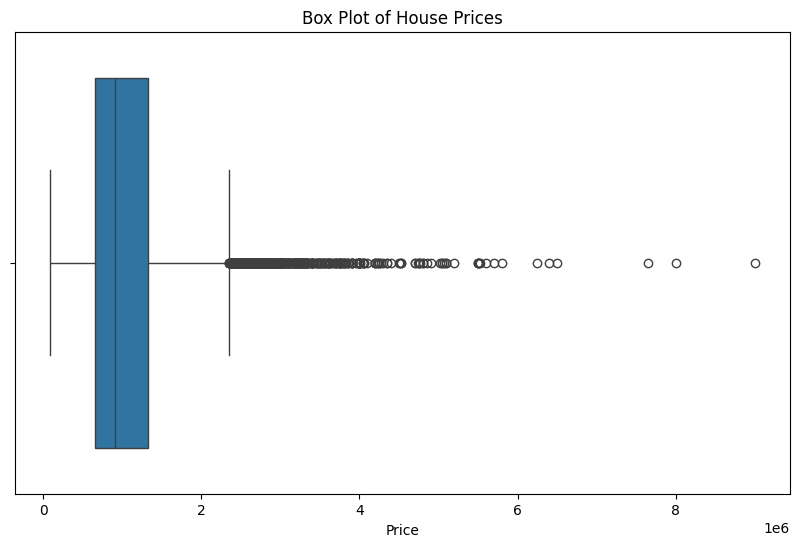

In [46]:
# Box plot for a specific numerical feature, e.g., 'Price'
plt.figure(figsize=(10, 6))
sns.boxplot(x=data['Price'])
plt.title('Box Plot of House Prices')
plt.show()

In [47]:
from scipy import stats

# Calculate Z-scores
z_scores = stats.zscore(data['Price'])
outliers = data[abs(z_scores) > 3]
print("Outliers based on Z-score:\n", outliers)

Outliers based on Z-score:
        Suburb  Address  Rooms  Type      Price  Method  SellerG  Date  \
102         4    13326      3     0  3010000.0       1       85    18   
108         4     1775      4     0  4735000.0       1      135    31   
112         4     5468      3     0  3755000.0       1       85    32   
233        11     1624      2     2  3625000.0       1      106    49   
234        11    10403      4     0  3000000.0       4      106    49   
...       ...      ...    ...   ...        ...     ...      ...   ...   
13466     170    10814      4     0  3300000.0       3      106    33   
13468     170     3203      5     0  3450000.0       0      111    33   
13474     178    12007      4     0  3080000.0       3      106    33   
13483     186    12858      3     0  3400000.0       3      104    33   
13555     273     6804      4     0  3100000.0       4      135    33   

       Distance  Postcode  ...  Bathroom  Car  Landsize  BuildingArea  \
102         3.3    320

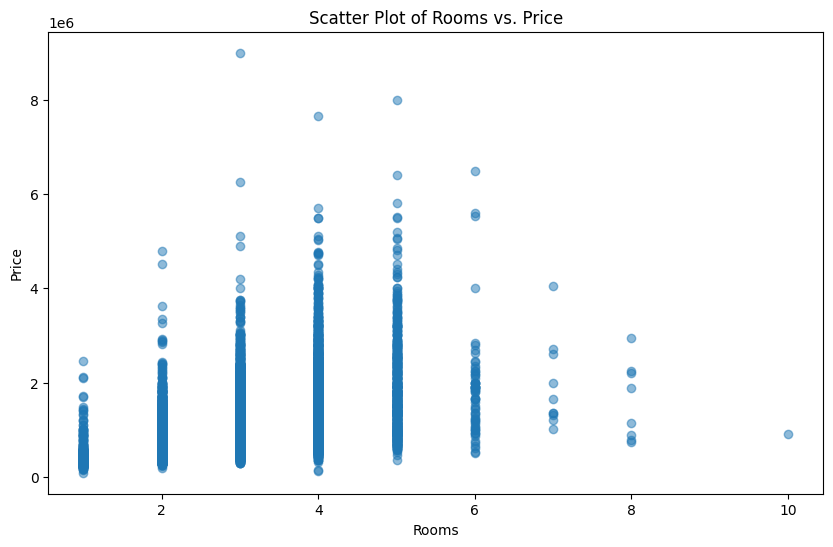

In [49]:
#Scatter Plot
plt.figure(figsize=(10, 6))
plt.scatter(data['Rooms'], data['Price'], alpha=0.5)
plt.title('Scatter Plot of Rooms vs. Price')
plt.xlabel('Rooms')
plt.ylabel('Price')
plt.show()

In [14]:
# Preprocess the data: Fill missing values and encode categorical features
# Fill missing values for numerical columns only
numeric_cols = data.select_dtypes(include=[np.number]).columns
data[numeric_cols] = data[numeric_cols].fillna(data[numeric_cols].median())

# Drop rows where target variable 'Price' is missing
data.dropna(subset=['Price'], inplace=True)

# Encoding categorical features using LabelEncoder
cat_cols = data.select_dtypes(include=['object']).columns
le = LabelEncoder()
for col in cat_cols:
    data[col] = le.fit_transform(data[col].astype(str))

# Separate features and target variable
X = data.drop('Price', axis=1)
y = data['Price']

Using the median instead of the mean is often a more robust and reliable method for summarizing central tendencies, particularly in datasets that are likely to contain outliers or are skewed, such as housing prices. It helps ensure that your analysis reflects the majority of the data more accurately without being distorted by extreme values.

In [23]:
print("Shape of X:", X.shape)
print("Shape of y:", y.shape)

Shape of X: (13580, 20)
Shape of y: (13580,)


The shape of 
𝑋
X (13580, 20) indicates there are 13,580 samples with 20 features each. The shape of 
𝑦
y (13580,) shows that there is one target value for each sample, indicating a supervised learning task.

In [19]:
# Step 1: Correlation
correlation = X.corrwith(y).abs().sort_values(ascending=False)
print("\nCorrelation with target variable:\n", correlation)


Correlation with target variable:
 Rooms            0.496634
Bedroom2         0.475951
Bathroom         0.467038
Type             0.414566
YearBuilt        0.259387
Car              0.239109
Lattitude        0.212934
Longtitude       0.203656
Distance         0.162522
Suburb           0.135830
Postcode         0.107867
Regionname       0.079109
BuildingArea     0.069763
CouncilArea      0.063653
SellerG          0.052109
Address          0.049186
Propertycount    0.042153
Method           0.037741
Landsize         0.037507
Date             0.021088
dtype: float64


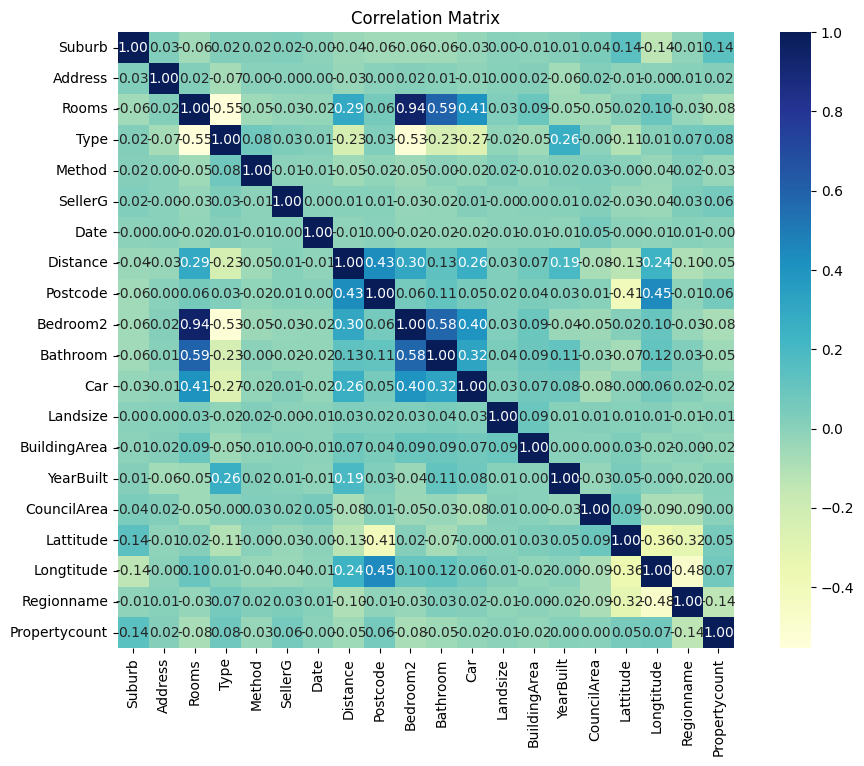

In [45]:
# Display the correlation matrix
correlation_matrix = X.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='YlGnBu', square=True)
plt.title('Correlation Matrix')
plt.show()

In [20]:
# Step 2: Chi-Square
# Only applicable for categorical features, let's select categorical columns
X_cat = X[cat_cols]
chi2_scores, p_values = chi2(X_cat, y.astype(int))
chi2_results = pd.DataFrame({'Feature': X_cat.columns, 'Chi2 Score': chi2_scores})
chi2_results = chi2_results.sort_values(by='Chi2 Score', ascending=False)
print("\nChi-Square Scores:\n", chi2_results)


Chi-Square Scores:
        Feature    Chi2 Score
1      Address  4.984043e+06
0       Suburb  1.270651e+05
4      SellerG  9.856697e+04
5         Date  2.026337e+04
6  CouncilArea  1.712327e+04
2         Type  7.661590e+03
7   Regionname  2.595771e+03
3       Method  1.883264e+03


In [21]:
 #Step 3: Mutual Information
mutual_info = pd.Series(mutual_info_regression(X, y)).sort_values(ascending=False)
print("\nMutual Information:\n", mutual_info)


Mutual Information:
 8     0.317779
2     0.231209
0     0.226953
9     0.211306
13    0.208609
7     0.204829
19    0.202825
15    0.189726
3     0.176650
17    0.155426
16    0.147475
12    0.142819
5     0.126692
10    0.123987
1     0.120872
4     0.107874
18    0.104233
11    0.101376
14    0.078641
6     0.017814
dtype: float64


In [17]:
# Step 4: Random Forest Feature Importance
rf = RandomForestRegressor()
rf.fit(X, y)
importances = rf.feature_importances_
rf_importances = pd.Series(importances, index=X.columns).sort_values(ascending=False)
print("\nRandom Forest Feature Importances:\n", rf_importances)


Random Forest Feature Importances:
 Distance         0.205848
Rooms            0.177651
Postcode         0.153230
Landsize         0.088801
Type             0.088573
Longtitude       0.049728
BuildingArea     0.045469
Lattitude        0.034924
Bathroom         0.030150
YearBuilt        0.020180
Address          0.016719
Propertycount    0.015940
Date             0.015055
Suburb           0.012704
CouncilArea      0.012629
SellerG          0.010009
Car              0.008817
Bedroom2         0.006541
Method           0.006337
Regionname       0.000695
dtype: float64


In [25]:
print("Length of X.columns:", len(X.columns))
print("Length of correlation.values:", len(correlation.values))
print("Length of chi2_results['Chi2 Score'].values:", len(chi2_results['Chi2 Score'].values))
print("Length of mutual_info.values:", len(mutual_info.values))
print("Length of rf_importances.values:", len(rf_importances.values))

Length of X.columns: 20
Length of correlation.values: 20
Length of chi2_results['Chi2 Score'].values: 8
Length of mutual_info.values: 20
Length of rf_importances.values: 20


The Chi-Square test results in only 8 values indicate that only 8 features are categorical, while the remaining features (12) may be numerical or of other types

In [26]:
print("Categorical columns in X:", cat_cols)

Categorical columns in X: Index(['Suburb', 'Address', 'Type', 'Method', 'SellerG', 'Date', 'CouncilArea',
       'Regionname'],
      dtype='object')


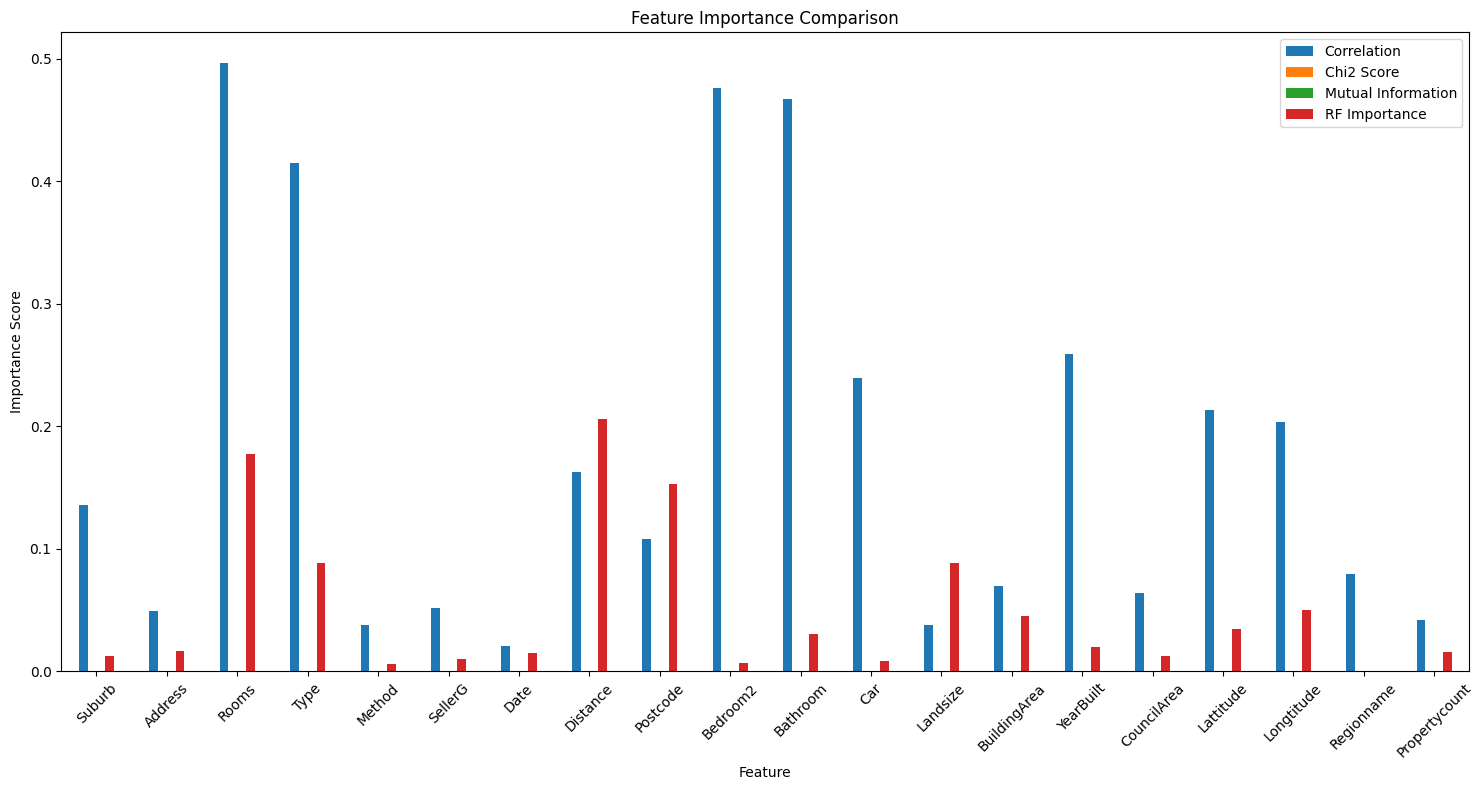

In [27]:
# Step 5: Comparing Feature Importance
# Create the DataFrame with proper alignment
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Correlation': correlation.reindex(X.columns).values,
    'Chi2 Score': chi2_results['Chi2 Score'].reindex(X.columns).values,  # aligns with X.columns
    'Mutual Information': mutual_info.reindex(X.columns).values,
    'RF Importance': rf_importances.reindex(X.columns).values
})

# Fill NaN for features not present in chi2_results
feature_importance_df['Chi2 Score'] = feature_importance_df['Chi2 Score'].fillna(0)


# Plotting feature importance comparison
feature_importance_df.set_index('Feature').plot(kind='bar', figsize=(15, 8))
plt.title('Feature Importance Comparison')
plt.ylabel('Importance Score')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

# <small><u>Comments on Feature Selection Techniques</u></small>

## <small>1. Correlation</small>
The correlation analysis shows that Rooms (0.496) has the highest positive correlation with the target variable, indicating it is a strong predictor.
## <small>2. Chi-Square</small>
This technique effectively evaluates the relationship between categorical features and the target.
## <small>3. Mutual Information</small>
The feature with the highest score likely captures significant non-linear relationships with the target.
## <small>4. Random Forest Importance</small>
Identifies Distance and Rooms as the most important features, highlighting their significance in decision tree structures.
### <small>Summary</small>
Random Forest Feature Importance is a highly reliable and effective method in this case, while Chi-Square might not be as useful due to the dataset containing mainly continuous features.Overall, the comparative analysis indicates that both Rooms and Distance are pivotal in predicting the target variable across multiple methods.